In [13]:
import pandas as pd

# Especificamos de que tipo son los datos
dtypes = {
  "Date": str,
  "Time": str, 
  "Global_active_power": float,
  "Global_reactive_power": float,
  "Voltage": float,
  "Global_intensity": float,
  "Sub_metering_1": float,
  "Sub_metering_2": float,
  "Sub_metering_3": float
}

route1 = "C:\\Users\\Santiago D\\Documents\\Universidad\\2024-1\\Procesos 2\\DataBase\\household_power_consumption.txt"
Energy = pd.read_csv(route1,delimiter=";",dtype=dtypes,na_values="?")

In [6]:
Energy.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [8]:
Energy.duplicated().sum()

0

In [9]:
# Tratamos los valores nulos con la mediana de cada fila
for i in Energy.columns[2:]:
    median = Energy[i].median()
    Energy[i].fillna(median, inplace=True)

In [10]:
Energy.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
# Convierte la columna 'Date' al formato datetime
Energy['Date'] = pd.to_datetime(Energy['Date'], format='%d/%m/%Y')

# Formatea la columna 'Date' al nuevo formato 'aaaa-mm-dd'
Energy['Date'] = Energy['Date'].dt.strftime('%Y-%m-%d')

In [12]:
Energy.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
route2 = "C:\\Users\\Santiago D\\Documents\\Universidad\\2024-1\\Procesos 2\\DataBase\\EnergyConsumption.csv"
Energy.to_csv(route2, index=False)

Maejamos los mensajes que le enviamos a la base de datos con el siguiente codigo

In [11]:
import paho.mqtt.client as mqtt
import json
import time

# Conectar con el broker MQTT
client = mqtt.Client()
client.connect("localhost", 1883)

for index, fila in Energy.iloc[243168:].iterrows():
    # Crear un diccionario con los valores de la fila
    mensaje = {
        "Date": fila["Date"],
        "Time": fila["Time"],
        "Gap": fila["Global_active_power"],  # Mapear el nombre de la columna
        "Grp": fila["Global_reactive_power"],  # Mapear el nombre de la columna
        "Voltage": fila["Voltage"],
        "Gi": fila["Global_intensity"],  # Mapear el nombre de la columna
        "Sm1": fila["Sub_metering_1"],  # Mapear el nombre de la columna
        "Sm2": fila["Sub_metering_2"],  # Mapear el nombre de la columna
        "Sm3": fila["Sub_metering_3"]  # Mapear el nombre de la columna
    }
    
    # Convertir el diccionario a formato JSON
    mensaje_json = json.dumps(mensaje)
    
    # Publicar el mensaje en el tema "val1"
    client.publish("val1", mensaje_json)
    time.sleep(0.05)

# Desconectar del broker MQTT
client.disconnect()

Se hace el tratamieto de la base de datos para ver las horas en donde mas se consume energia

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv(route2)

# Preprocesar los datos
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=True)
df["Hour"] = df["DateTime"].dt.hour

# Calcular el promedio de consumo de energía por hora del día
avg_energy_consumption = df.groupby("Hour")[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].mean()

La hora de mayor consumo para Sub_metering_1 es las 21:00 horas.
La hora de mayor consumo para Sub_metering_2 es las 14:00 horas.
La hora de mayor consumo para Sub_metering_3 es las 8:00 horas.


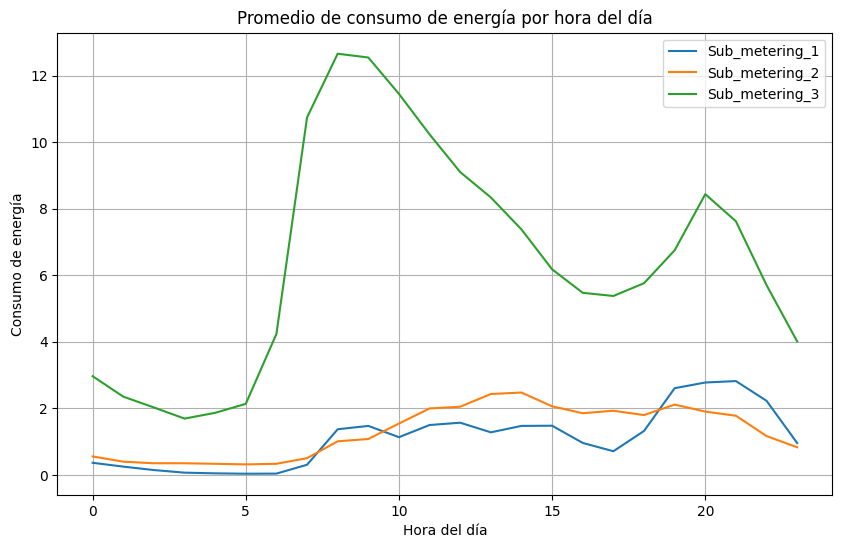

In [38]:
# Generar la gráfica
plt.figure(figsize=(10, 6))
avg_energy_consumption.plot(ax=plt.gca())
plt.title("Promedio de consumo de energía por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Consumo de energía")
plt.grid(True)
plt.legend(["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"])

# Comentario adicional
# Por ejemplo, encuentra la hora con el mayor promedio de consumo para cada submedidor
max_hour_sub_metering_1 = avg_energy_consumption["Sub_metering_1"].idxmax()
max_hour_sub_metering_2 = avg_energy_consumption["Sub_metering_2"].idxmax()
max_hour_sub_metering_3 = avg_energy_consumption["Sub_metering_3"].idxmax()

print(f"La hora de mayor consumo para Sub_metering_1 es las {max_hour_sub_metering_1}:00 horas.")
print(f"La hora de mayor consumo para Sub_metering_2 es las {max_hour_sub_metering_2}:00 horas.")
print(f"La hora de mayor consumo para Sub_metering_3 es las {max_hour_sub_metering_3}:00 horas.")

plt.show()

Convertimos los datos extraidos a JSON para poderlos madar a Node-Red

In [35]:
payload = {"labels":avg_energy_consumption.index.tolist(),
           "data":[avg_energy_consumption["Sub_metering_1"].values.tolist(),
                   avg_energy_consumption["Sub_metering_2"].values.tolist(),
                   avg_energy_consumption["Sub_metering_3"].values.tolist()],
           "series":["SubMeter1","SubMeter2","SubMeter3"]
           }
print(payload)

{'labels': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'data': [[0.36437753681674095, 0.24895833333333334, 0.14585844871779866, 0.06776466732218944, 0.04714183574199749, 0.03570255688482289, 0.03943278715443531, 0.30520378969091505, 1.3717802919280144, 1.472912466594777, 1.1335397897897899, 1.4994838588588588, 1.5689487440955496, 1.2798921959221936, 1.4727240793864529, 1.4785073438122234, 0.9607195171969297, 0.7117795954719104, 1.3202690194148594, 2.6061817586682565, 2.7769432926473163, 2.8201662593973973, 2.2271340572510607, 0.9577956989247312], [0.5553917956276099, 0.39796348314606744, 0.3501328433151137, 0.3500608699723744, 0.33404831393508916, 0.3156931738212526, 0.3342990182854596, 0.503083814080015, 1.009836449967759, 1.0792934502320783, 1.5437077702702702, 1.997606981981982, 2.049556360397107, 2.4312397468947737, 2.4751244072361103, 2.0618309166295767, 1.853354426671354, 1.9287974312700682, 1.7982705894759043, 2.1131841668420193, 1.902

In [36]:
import paho.mqtt.client as mqtt
import json

# Configurar el cliente MQTT
client = mqtt.Client()
client.connect("localhost", 1883)  # Especifica la dirección y el puerto del broker MQTT

# Publicar el JSON en un tema MQTT
client.publish("val2", json.dumps(payload))

# Desconectar el cliente MQTT
client.disconnect()

0